In [1]:
import pandas as pd
import json
import pytz # package to convert time zones
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
import sqlite3
from sqlite3 import Error # packages to create databases

In [2]:
df_citybikes=pd.read_csv('Paris_data.csv')
df_citybikes=df_citybikes.head(500) # limiting my data to 500 to reduce the API request and saving it as a new data frame for this notebook 
api_df = pd.read_csv('Yelp_data.csv')
# store the following table in SQlite

In [3]:
# pulling the foursq data base to create table in the data base
four_sq_df=pd.read_csv('four_sq_data.csv')

In [47]:
df_citybikes.drop(columns=["latitude","longitude"])

,name_of_station,empty_slots,free_bikes,timestamp,lat&lon
0,Benjamin Godard - Victor Hugo,32,3,2023-12-04T04:49:10.102000Z,48.865983_2.275725
1,André Mazet - Saint-André des Arts,33,21,2023-12-04T04:49:09.860000Z,48.853756_2.339096
2,Faubourg Du Temple - Republique,26,11,2023-12-04T04:49:07.405000Z,48.867872_2.364898
3,Beaux-Arts - Bonaparte,11,9,2023-12-04T04:49:07.921000Z,48.856452_2.334852
4,Toudouze - Clauzel,15,6,2023-12-04T04:49:08.016000Z,48.879296_2.33736
...,...,...,...,...,...
495,Mozart - Jasmin,60,1,2023-12-04T04:49:07.954000Z,48.852861_2.268484
496,Boulets - Faubourg Saint-Antoine,36,7,2023-12-04T04:49:08.860000Z,48.849259_2.391755
497,Haies - Réunion,16,6,2023-12-04T04:49:08.680000Z,48.853869_2.402426
498,Maine - Antoine Bourdelle,14,3,2023-12-04T04:49:10.012000Z,48.843085_2.320264


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [48]:
Paris_merged_df = pd.merge(df_citybikes,api_df,on="lat&lon")
Paris_merged_df

,name_of_station,empty_slots,free_bikes,latitude,longitude,timestamp,lat&lon,name,rating,reviews,price,address,distance_on_yelp
0,Benjamin Godard - Victor Hugo,32,3,48.865983,2.275725,2023-12-04T04:49:10.102000Z,48.865983_2.275725,La Coïncidence,4.5,509,2.0,15 rue Mesnil,675.0
1,Benjamin Godard - Victor Hugo,32,3,48.865983,2.275725,2023-12-04T04:49:10.102000Z,48.865983_2.275725,Le Poincaré,4.0,150,2.0,22 avenue Raymond Poincaré,796.0
2,Benjamin Godard - Victor Hugo,32,3,48.865983,2.275725,2023-12-04T04:49:10.102000Z,48.865983_2.275725,Crêperie Framboise Passy-Trocadéro,4.5,65,2.0,10 bd Delessert,1046.0
3,Benjamin Godard - Victor Hugo,32,3,48.865983,2.275725,2023-12-04T04:49:10.102000Z,48.865983_2.275725,Sgabetti,4.5,40,2.0,15 rue Sablons,581.0
4,Benjamin Godard - Victor Hugo,32,3,48.865983,2.275725,2023-12-04T04:49:10.102000Z,48.865983_2.275725,L'Astrance,4.5,64,4.0,4 rue Beethoven,1194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Square Saint-Ambroise,30,11,48.860934,2.375841,2023-12-04T04:49:08.992000Z,48.860934_2.375841,Paparotti,4.0,4,NaN,14 rue Victor Griffuelhes,126.0
816,Square Saint-Ambroise,30,11,48.860934,2.375841,2023-12-04T04:49:08.992000Z,48.860934_2.375841,Café Chérie,3.5,21,2.0,1 rue des 4 Cheminées,263.0
817,Square Saint-Ambroise,30,11,48.860934,2.375841,2023-12-04T04:49:08.992000Z,48.860934_2.375841,Chez Madeleine,4.5,21,2.0,39 rue de Paris,997.0
818,Square Saint-Ambroise,30,11,48.860934,2.375841,2023-12-04T04:49:08.992000Z,48.860934_2.375841,Sitar,3.5,13,1.0,7 rue liot,84.0


In [108]:
# to show the number of station close to a business
grouping_df = Paris_merged_df.groupby('name').agg({'name_of_station':'count' ,
                                     'free_bikes':'sum',
                                     'distance_on_yelp':'max'}).sort_values(ascending=False,by='free_bikes')
grouping_df

,name_of_station,free_bikes,distance_on_yelp
name,,,
Bustronome,9,119,8486.0
Schwartz's Deli,5,55,1063.0
Lao Viet,2,49,1087.0
John Viande,8,48,941.0
Da Franco,3,45,1117.0
...,...,...,...
Le Bistrot des Soupirs,1,0,218.0
Il Pinocchio,1,0,329.0
Au Bon Coin,1,0,236.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [101]:
Paris_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 819
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype                           
---  ------              --------------  -----                           
 0   name_of_station     813 non-null    object                          
 1   empty_slots         813 non-null    int64                           
 2   free_bikes          813 non-null    int64                           
 3   latitude            813 non-null    float64                         
 4   longitude           813 non-null    float64                         
 5   timestamp           813 non-null    datetime64[ns, UTC]             
 6   lat&lon             813 non-null    object                          
 7   name                813 non-null    object                          
 8   rating              813 non-null    float64                         
 9   reviews             813 non-null    int64                           
 10  price  

In [80]:
# dropping rows wil null values in address as it is a very small percentage of data
Paris_merged_df=Paris_merged_df.dropna(subset=['address'])


In [ ]:
#checking and alter data types of columns if needed
Paris_merged_df['timestamp']=pd.to_datetime(Paris_merged_df['timestamp'])
# changing the time zone fron UTC to America/Edmonton
edmonton_timezone = pytz.timezone('America/Edmonton')
Paris_merged_df['timestamp_edmonton'] = Paris_merged_df['timestamp'].dt.tz_convert(edmonton_timezone)
Paris_merged_df

In [131]:
grouping_df.describe()

,name_of_station,free_bikes,distance_on_yelp
count,548.000000,548.000000,548.000000
mean,1.483577,11.872263,624.673358
std,0.954976,10.637200,500.160038
min,1.000000,0.000000,9.000000
25%,1.000000,4.000000,282.000000
50%,1.000000,9.000000,576.000000
75%,2.000000,17.000000,932.000000
max,9.000000,119.000000,8486.000000


#### At this point I am not dropping the null values from the price column as it is a small portion(about 100) in comparision to the data frame we are working with and also i am not directly using it in my model for the purpose of this project.

C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21352\1592886460.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


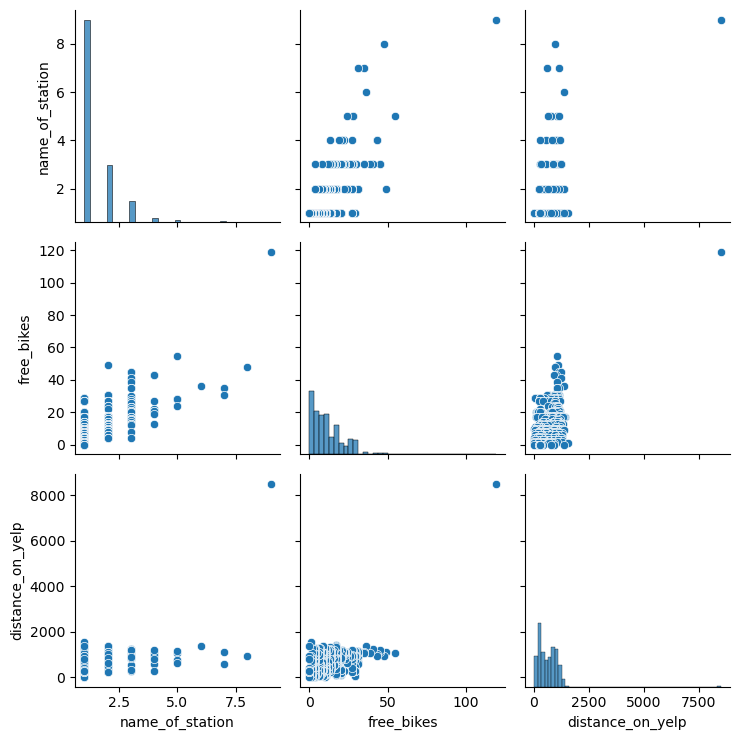

In [134]:
# visualization for the grouped data
sns.pairplot(grouping_df)
plt.tight_layout()
plt.show()


##### This plot does not give a very good visualization as it may be due to the extreme value we can see which is the furthest away from a set of coordinates(close to 8500 m). I am going to remove that row and see if we can make a better visual analysis of the data.

In [160]:
# removing outliers from  data

filtered_group_df=grouping_df['distance_on_yelp']<=1000
new_group_df=grouping_df[filtered_group_df]
new_group_df

,name_of_station,free_bikes,distance_on_yelp
name,,,
John Viande,8,48,941.0
L'Orange Bleue,4,43,997.0
Cité des Sciences et de l'Industrie,4,43,927.0
Roca,2,31,664.0
L'Aligot,2,31,905.0
...,...,...,...
Le Bistrot des Soupirs,1,0,218.0
Il Pinocchio,1,0,329.0
Au Bon Coin,1,0,236.0


C:\Users\shrut\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21352\3868776568.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


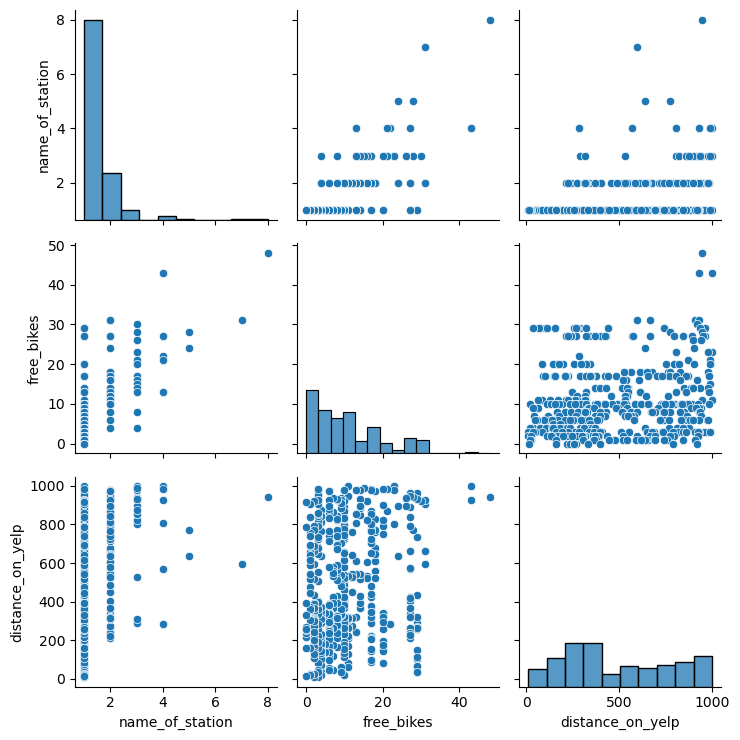

In [161]:
sns.pairplot(new_group_df)
plt.tight_layout()
plt.show()


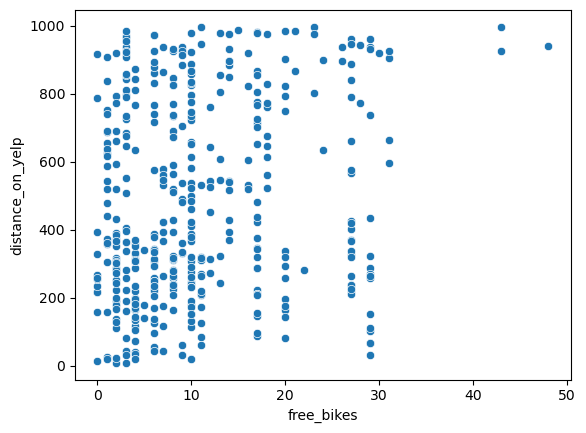

In [163]:
sns.scatterplot(data=new_group_df, x='free_bikes', y='distance_on_yelp')
plt.show()

In [164]:
grouping_df.corr()

,name_of_station,free_bikes,distance_on_yelp
name_of_station,1.000000,0.637416,0.504799
free_bikes,0.637416,1.000000,0.453163
distance_on_yelp,0.504799,0.453163,1.000000


In [165]:
new_group_df.corr()

,name_of_station,free_bikes,distance_on_yelp
name_of_station,1.00000,0.504750,0.369620
free_bikes,0.50475,1.000000,0.177047
distance_on_yelp,0.36962,0.177047,1.000000


#### We can see that removing those outliers has changed the correlation table and we have established from the visual plotting and the above table that all these columns at the most have a not strong to weak correlation with each other 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [15]:
# creating a function to establish connection with SQlite
def create_connection(path):
    """
    path (string_name.sqlite): the name of the database 
    returns: connection object
    """
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [16]:
connection = create_connection("Paris.db")

Connection to SQLite DB successful


In [17]:
# creating a function to execute queries
def execute_query(connection, query):
    """
    connection (object) : object returned from the create connection function
    query (sql query variable): the operation that you are trying to perfom
    
    """
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
    # finally:
    #     cursor.close()
    #     connection.close()

### creating tables for the database

In [18]:
create_citybikes_table= """
CREATE TABLE IF NOT EXISTS city_bikes (
name_of_station string NOT NULL,
empty_slots integer,
free_bikes integer,
latitude float NOT NULL,
longitude float NOT NULL,
timestamp datetime,
lat_lon float PRIMARY KEY
);
"""

In [23]:
create_foursq_table="""
CREATE TABLE IF NOT EXISTS fourSQ_API(
lat_lon float,
name_of_business string NOT NULL,
distance integer NOT NULL,
address string NOT NULL,
PRIMARY KEY(lat_lon,address)
);
"""

In [20]:
create_yelp_table="""
CREATE TABLE IF NOT EXISTS yelp_API(
lat_lon float ,
name string NOT NULL,
rating float,
reviews integer,
price_category string,
address string NOT NULL,
distance float NOT NULL,
PRIMARY KEY(lat_lon,address)
);
"""

### passing the variables through the execute function

In [21]:
execute_query(connection, create_citybikes_table)

Query executed successfully


In [24]:
execute_query(connection, create_foursq_table)

Query executed successfully


In [25]:
execute_query(connection, create_yelp_table)

Query executed successfully


### Inserting data into tables

#### creating tuples from each data frame and using executemany() to insert multiple records at once and a SQL INSERT INTO command to insert these tuples into the respective table in your database

In [ ]:
yelp_tuples = list(api_df.to_records(index=False))

conn = sqlite3.connect('Paris.sqlite')
cursor2 = conn.cursor()

# SQL statement for inserting data
insert_query = """
INSERT INTO yelp_API (lat_lon, name, rating, reviews, price_category, address, distance)
VALUES (?, ?, ?, ?, ?, ?, ?)
"""

# Insert data into the database using execumany()
cursor2.executemany(insert_query, yelp_tuples)


In [26]:
api_df.to_sql('yelp_API', connection, if_exists='replace', index=False)

9930

In [197]:
# function to read the tables from the database
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

Look at the data before and after the join to validate your data.